### Tutorial:  Spectroscopy

This tutorial documents basic python usage to analyze spectroscopic data.

In [1]:
# import the usual

import numpy as np
from astropy.io import fits

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

Download [spec_example.fits](https://github.com/anjavdl/PHY517_AST443/raw/refs/heads/master/tutorials/spec_example.fits) from the wiki, and open it in ds9.  Set the scale to zscale.  The image should look like this:
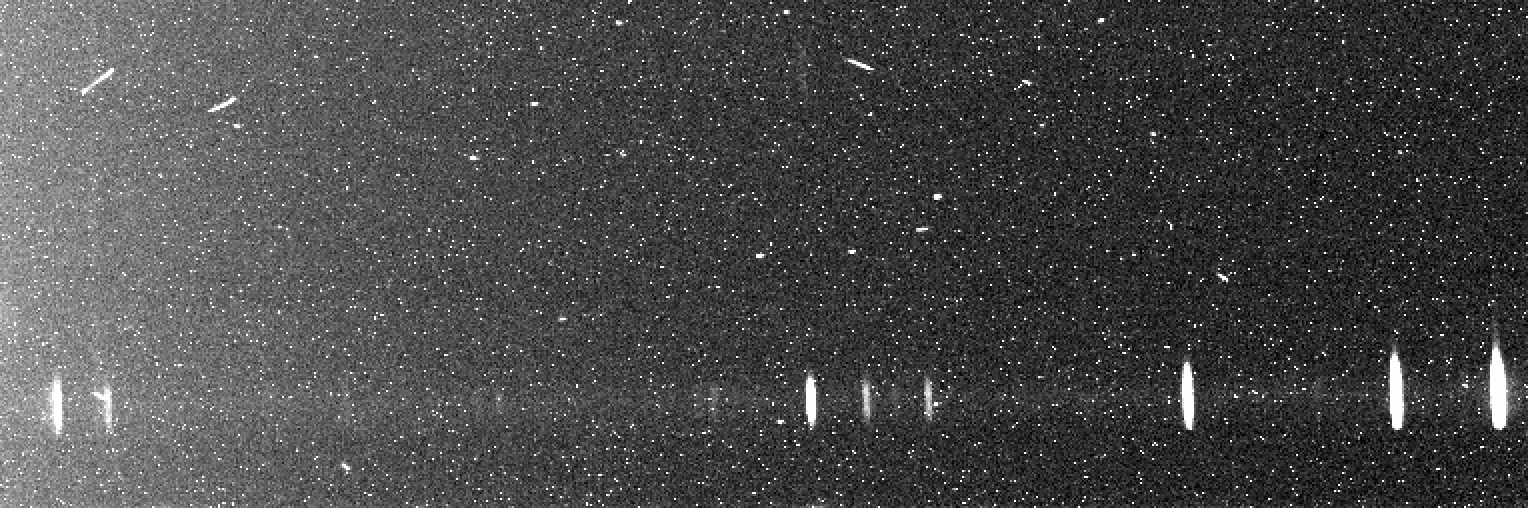

In the image, wavelength runs along the x-axis, and spatial information along the y-axis.  Our spectrograph has 3 slits; the bottom one has been placed on a planetary nebula (PN).  PNs are emission-line objects, hence we only see discrete emission lines, and no continuum emission.

In [2]:
# read in the data - note that this is a 2d image

hdulist = fits.open('spec_example.fits')
spec_head = hdulist[0].header
spec_2d = hdulist[0].data
# let's find out the number of rows, and number of columns:
nrows = np.shape(spec_2d)[0]
ncols = np.shape(spec_2d)[1]

### Image cutting and "projecting" onto 1d

Spectra are usually visualized as plots of flux vs. wavelength.  Usually, the object extends over several rows; therefore we need to sum over the rows with object flux.  To do so, first hover your cursor over the image in ds9, and read off the range of y-values, then sum only over the rows in that range.  (Note that technically, fits images are 1-indexed, and python arrays are 0-indexed, so there may be on offset of +/-1 when going from one to the other.)

In [3]:
# sum over all rows to make a 1d spectrum - however, most rows have no object flux
spec_1d_all = np.sum(spec_2d, axis=0)

# sum over rows 40-60 to make a 1d spectrum; these are the rows that contain the nebula
spec_1d = np.sum(spec_2d[40:60,:], axis=0)

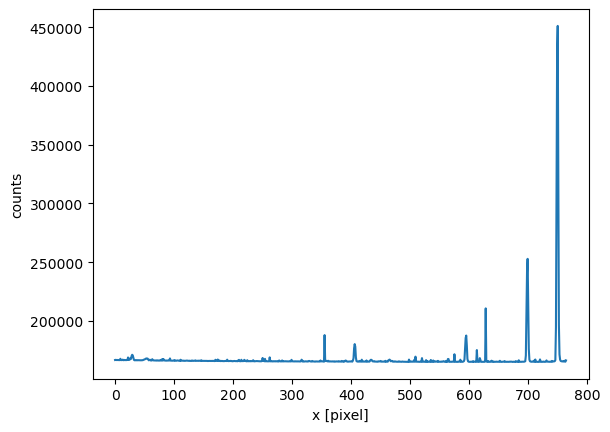

In [4]:
# plot the spectrum

plt.plot(spec_1d)
plt.xlabel('x [pixel]')
plt.ylabel('counts')
plt.show()

### Writing out a 2d spectrum

When you are dividing by the flat-field, you need to turn a 1-d array into a 2-d array of the same dimension as the input 2-d spectrum, with every row being the same.  It may also be helpful to write out this 2-d array into a fits file, in case you are using FTOOLS to divide the data by the flat-field.

In [5]:
# build a 1-d array for the x-coordinates, that is the same length as the spectrum:
x=np.arange(ncols)

# make a 1d array from a function (e.g. flat-field counts as function of x-coordinate) *** THIS IS ONLY A PLACEHOLDER EXAMPLE ***
func_1d = 200000 + 100*x

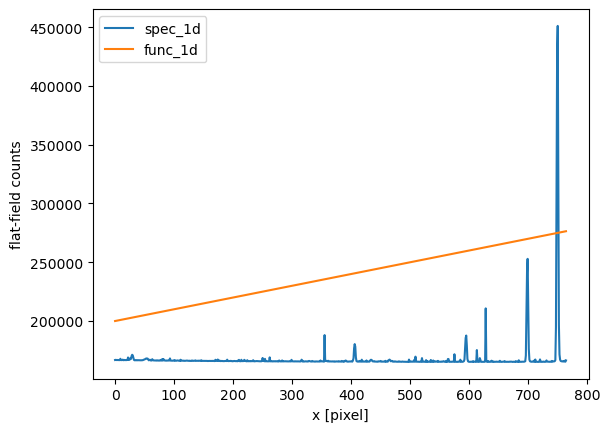

In [6]:
plt.plot(spec_1d)
plt.plot(func_1d)
plt.xlabel('x [pixel]')
plt.ylabel('flat-field counts')
plt.legend(['spec_1d','func_1d'])
plt.show()

In [7]:
# make 2d array of the same dimension as the 2-d spectrum,
# where each row is set by func_1d

func_2d = np.broadcast_to(func_1d,(nrows,ncols))

In [8]:
# write out the image
# add comment line to header
spec_head['HISTORY'] = 'normalized by best-fit 2nd degree polynomial'
fits.writeto('spec_out.fits',func_2d,spec_head,overwrite=True)

### Adding information to the x-axis

At this point, spec_1d is a one-dimensional array.  The x-coordinate is simply the array index, and specifies the x-pixel coordinate.   To add wavelength information to the spectrum, we can make a new one-dimensional array, which specifies the wavelength at each x-pixel position.  Determining the function that maps pixel position -> wavelength is called "finding the wavelength solution"; for this tutorial, we will use a simple approximation.

In [9]:
# make a 1d array based on the wavelength solution  *** THIS IS ONLY A PLACEHOLDER EXAMPLE ***
wavelength = 4242 + 1*x

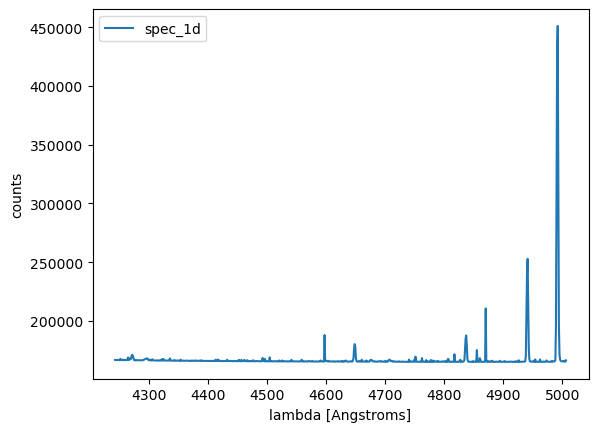

In [10]:
plt.plot(wavelength,spec_1d)
plt.xlabel('lambda [Angstroms]')
plt.ylabel('counts')
plt.legend(['spec_1d'])
plt.show()